In [27]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
from scipy import optimize
from pylab import *

import struct
import bz2
import re

In [11]:
# path to the dir that saves all the dose test resutls
dirname ='D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/' 

## Calculate precisions from different parameter set tests

7
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/StartLevel\2\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/StartLevel\3\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/StartLevel\4\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/StartLevel\5\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/StartLevel\6\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/StartLevel\7\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/StartLevel\8\HAADF_NRR\stage3\


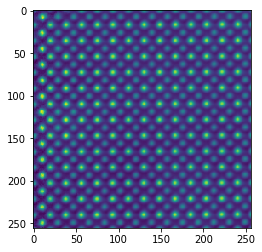

In [43]:
path = dirname + 'StartLevel/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_startlevel = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_startlevel[i,0:2] = [xprec,yprec]
    # replace \\ with / in case of working under windows system, the parameter should be the fourth from end
    prec_array_startlevel[i,2] = float(glob.glob(path)[i].replace('\\','/').split('/')[-4])

17
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\0\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\0.01\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\0.1\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\0.5\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\1\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\10\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\100\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\1000\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\10000\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda\100000\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationP

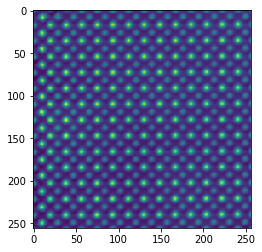

In [42]:
path = dirname + 'Lambda/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_lambda = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_lambda[i,0:2] = [xprec,yprec]
    prec_array_lambda[i,2] = float(glob.glob(path)[i].replace('\\','/').split('/')[-4])

6
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/LambdaFactor\0.1\HAADF_NRR\stage3\
0.03180578610403315 0.040434623303612596
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/LambdaFactor\0.5\HAADF_NRR\stage3\
0.026154137752372953 0.03704099963769358
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/LambdaFactor\1\HAADF_NRR\stage3\
0.02573618103981663 0.03501586833956523
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/LambdaFactor\10\HAADF_NRR\stage3\
0.02528395650094784 0.033808617856592095
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/LambdaFactor\2\HAADF_NRR\stage3\
0.02573618103981663 0.03501586833956523
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/LambdaFactor\5\HAADF_NRR\stage3\
0.025455519960886425 0.034380833460457914


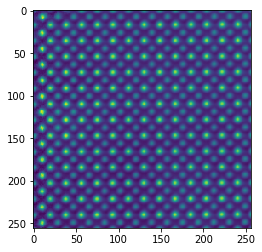

In [44]:
path = dirname + 'LambdaFactor/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_lambdafactor = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    print(xprec,yprec)
    prec_array_lambdafactor[i,0:2] = [xprec,yprec]
    prec_array_lambdafactor[i,2] = float(glob.glob(path)[i].replace('\\','/').split('/')[-4])


9
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\10\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1e-1\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1e-2\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1e-3\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1e-4\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1e-5\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1e-6\HAADF_NRR\stage3\
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Epsilon\1e-7\HAADF_NRR\stage3\


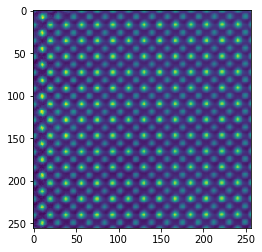

In [45]:
path = dirname + 'Epsilon/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_epsilon = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_epsilon[i,0:2] = [xprec,yprec]
    prec_array_epsilon[i,2] = float(glob.glob(path)[i].replace('\\','/').split('/')[-4])

8
D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/ExtraStage/HAADF_NRR\stage1\


ValueError: could not convert string to float: 'ExtraStage'

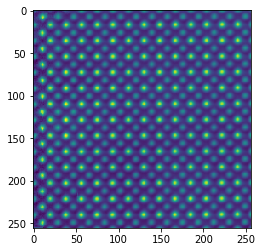

In [48]:
path = dirname + 'ExtraStage/HAADF_NRR/stage*/'
num = len(glob.glob(path))
print(num)
prec_array_extrastage = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_extrastage[i,0:2] = [xprec,yprec]
    prec_array_extrastage[i,2] = float(glob.glob(path)[i].replace('\\','/').split('/')[-4])

## Plot all the results in one figure

(3.5, 8.5)

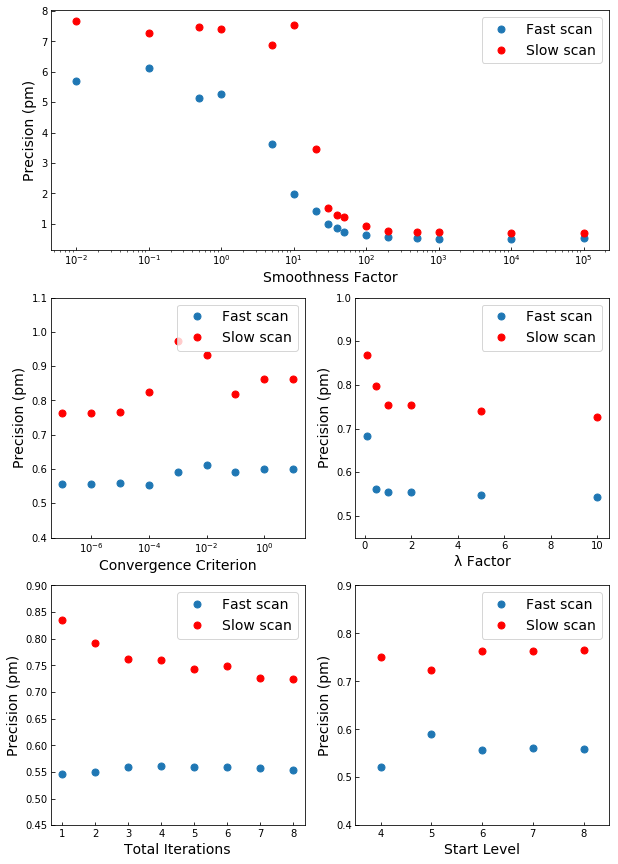

In [34]:
# Plot precision vs different parameters: lambda, stop threhold, lambda factor, registration stages, and start level
# Emphasize the effect of lambda by plotting it larger
fig = plt.figure(figsize=(10,15))
grid = plt.GridSpec(3,2)

ax = plt.subplot(grid[0,:])
plt.plot(prec_array_lambda[:,2],prec_array_lambda[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_lambda[:,2],prec_array_lambda[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.set_xscale('log')
ax.tick_params(direction='in')
plt.xlabel('Smoothness Factor',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14)

ax = plt.subplot(grid[1,0])
plt.plot(prec_array_epsilon[:,2],prec_array_epsilon[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_epsilon[:,2],prec_array_epsilon[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.set_xscale('log')
ax.tick_params(direction='in')
# plt.grid('on')
plt.xlabel('Convergence Criterion',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.4,1.1])

ax = plt.subplot(grid[1,1])
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.tick_params(direction='in')
# ax.set_xscale('log')
# plt.grid('on')
plt.xlabel('\u03BB Factor',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.45,1.0])

ax = plt.subplot(grid[2,0])
plt.plot(prec_array_extrastage[:,2],prec_array_extrastage[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_extrastage[:,2],prec_array_extrastage[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.tick_params(direction='in')
# plt.grid('on')
plt.xlabel('Total Iterations',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14)
ax.set_ylim([0.45,0.9])

ax = plt.subplot(grid[2,1])
plt.plot(prec_array_startlevel[:,2],prec_array_startlevel[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_startlevel[:,2],prec_array_startlevel[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.tick_params(direction='in')
plt.xlabel('Start Level',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.4,0.9])
ax.set_xlim([3.5,8.5])

0.2445494982909033 0.3446545085346527


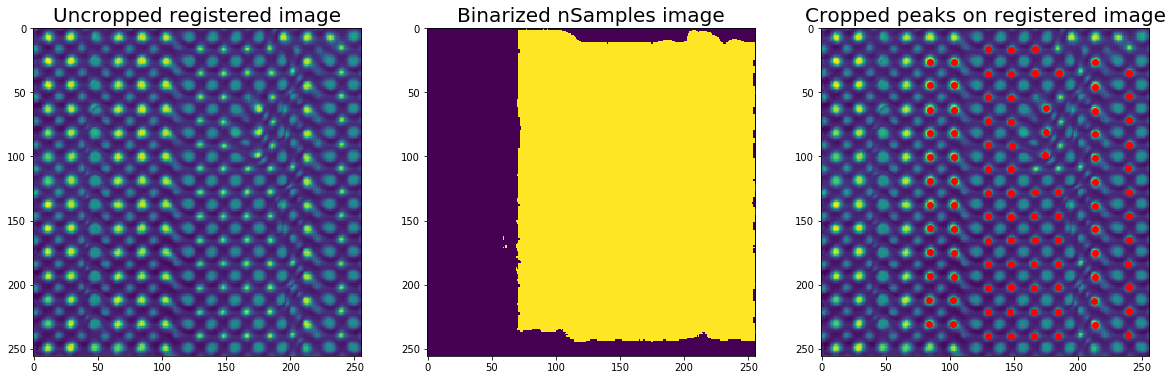

In [137]:
# Test functions on a single file
fig = plt.figure(figsize=(20,10))
path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/1/HAADF_NRR/stage3/average.q2bz'
fig.add_subplot(1,3,1)
img = LoadImage(path)
plt.imshow(img)
plt.title('Uncropped registered image',fontsize=20)

path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/1/HAADF_NRR/stage3/numSamples.q2bz'
nSamples = LoadNumSamples(path)
fig.add_subplot(1,3,2)
plt.imshow(nSamples)
plt.title('Binarized nSamples image',fontsize=20)

fig.add_subplot(1,3,3)
xprec, yprec = PrecisionFromFitting(img,nSamples)
plt.title('Cropped peaks on registered image',fontsize=20)
print(xprec,yprec)

In [2]:
def LoadImage(path):
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/average.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
#     print(fid.readline())   # description line
    fid.readline()    # do not print, but read the description line
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
#     print(width, height)
#     print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    img = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            img[irow,icol] = struct.unpack('d',read_bytes)[0]

#     plt.imshow(img)
#     plt.colorbar()
    return img

In [49]:
def LoadNumSamples(path):
    # crop image accroding to numsamples
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/numSamples.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
    # print(fid.readline())   # description line
    fid.readline()
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
    # print(width, height)
    # print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    nSamples = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            nSamples[irow,icol] = struct.unpack('d',read_bytes)[0]

    nSamples = np.heaviside(nSamples-np.amax(nSamples),1)

    return nSamples

In [41]:
# Calculate precision (std) from 2D Gaussian fitting
def PrecisionFromFitting(img,nSamples):
    image_max = ndi.maximum_filter(img, size=10, mode='constant')
    coordinates = peak_local_max(img, min_distance=15)
    plt.imshow(img)
    # plt.scatter(coordinates[:,0],coordinates[:,1])

    peaks_x_fit = []
    peaks_y_fit = []

    for i in range(coordinates.shape[0]):

        x = int(coordinates[i][1])
        y = int(coordinates[i][0])
        if nSamples[y,x] == 0:
            continue

        if x >=7 and y>=7:
            patch = img[y-6:y+6,x-6:x+6]
            patch = patch - amin(patch)
            bg = 0

            # parameters are in the order of : background, height, cx, cy, wx, wy
            guess = (bg,patch[6,6]-bg,6, 6, 3, 3)
            bounds = ([0,0,0,0,1,1],[np.inf,np.inf,10,10,10,10])
            param = fitGaussianx2(patch, guess, bounds)

            peaks_x_fit.append(param[2]+x-6)
            peaks_y_fit.append(param[3]+y-6)

#     plt.scatter(peaks_x_fit, peaks_y_fit,c='r')
    # separations are currently hard coded as 19px, returned values are precision in pixels
    xprec = FindXStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    yprec = FindYStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    return yprec, xprec

In [5]:
# Old precision calculation function using csv file, not in use here
def FindPrecision(csvFileName,txtFileName,threshold,separation):
    start = 0
    with open(csvFileName) as csvfile:
        file=csv.reader(open(csvFileName,'r'))
        peaks_x = []
        peaks_y = []
        for row in file:
            if start == 0:
                start = 1
                continue
            peaks_x.append(float(row[0]))
            peaks_y.append(float(row[1]))

    with open(txtFileName) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content];

    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))
        
    array_x = np.asarray(peaks_x)
    array_y = np.asarray(peaks_y)
    array_int = np.asarray(peaks_int)
    index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140))
    array_x = array_x[index]
    array_y = array_y[index]
    array_int = array_int[index]
        
    lattice1 = np.where(array_int>threshold)
    array_x1 = array_x[lattice1]
    array_y1 = array_y[lattice1]
    array_int1 = array_int[lattice1]

    return FindYStd(array_x1,array_y1,separation),FindXStd(array_x1,array_y1,separation)

In [6]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    while array_x1_copy.size != 0:
        x_cor = array_x1_copy[0]
        index = np.where((array_x1_copy<x_cor+3) & (array_x1_copy>x_cor-3))
        array_y_sub = array_y1_copy[index]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    y_std = np.std(np.asarray(y_sep))
    return y_std

In [7]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    while array_x1_copy.size != 0:
        y_cor = array_y1_copy[0]
        index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
        array_x_sub = array_x1_copy[index]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(array_x_sub[i+1] - array_x_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    x_std = np.std(np.asarray(x_sep))
    return x_std

In [8]:
def fitGaussianx2(data, guess, bounds):
    x = np.linspace(0, data.shape[1]-1, data.shape[1])
    y = np.linspace(0, data.shape[0]-1, data.shape[0])
    x, y = np.meshgrid(x, y)
    xdata_tuple = (x,y)
    popt, pcov = optimize.curve_fit(gaussianx2, xdata_tuple, data.ravel(), p0=guess,bounds=bounds,method='trf',verbose=0,maxfev=100000)
    return popt

In [9]:
def gaussianx2(xdata_tuple,bg,height, center_x, center_y, width_x, width_y):

    (x, y) = xdata_tuple
    width_x = float(width_x)
    width_y = float(width_y)
    g = height*exp(
                 -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)+bg
    return g.ravel()